In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools
import math

%matplotlib inline

4.1 Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
N = 10

for i in range(N):
    x = random.randint(0, 36)
    print(f'выпало {x}')

выпало 22
выпало 24
выпало 25
выпало 2
выпало 20
выпало 29
выпало 26
выпало 21
выпало 0
выпало 1


4.2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере подбрасывания монетки

In [3]:
t, l = 0, 0
N = 100

for i in range(N):
    x = random.randint(1, 10)
    if x <= 5:
        t += 1
    else:
        l += 1
        
print(f'выпало орлов {t}, выпало решек {l}')
print(f'Сумма вероятностей всех событий дает единицу, {t} + {l} = {t + l},\n'
      f'{t + l} / {N} = 1')


выпало орлов 53, выпало решек 47
Сумма вероятностей всех событий дает единицу, 53 + 47 = 100,
100 / 100 = 1


4.2.2 На конфетной фабрике собирают подарки к Новому Году из n=10 видов конфет. Берут примерно по M=100 г конфет каждого вида (но точно не получается, а выходит плюс-минус m, напр. 95...105 г). Т.е. выйдет вес всего подарка 1 кг плюс-минус накопленная погрешность. Всего собирают N=10000 подарков. Надо построить гистограмму распределения веса подарка. Ну и при желании- поиграться с параметрами N,n,M,m.

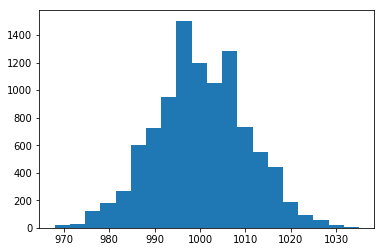

In [4]:
random_sum = []
N = 10000
n = 10
M = 100
m = 5
for i in range(N):
    sum_ = 0
    for j in range(n):
        x = random.randint(M - m, M + m)        
        sum_ += x
    random_sum.append(sum_)
        
plt.hist(random_sum, bins=20);

4.3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [5]:
def binomial(n, k, p):    
    C = math.factorial(n)/(math.factorial(n - k) * math.factorial(k))
    value = C * p**k * (1 - p)**(n - k)
    return value

In [6]:
print('истинная вероятность', binomial(4, 2, 0.5))

k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
x = a + b + c + d
for i in range(0, n):
    if x[i] == 2:
        k = k + 1
print(k, n, k/n)

истинная вероятность 0.375
3706 10000 0.3706


4.3.2 Повторите расчеты, взяв другие значения n и k.

In [7]:
print('истинная вероятность', binomial(6, 4, 0.5))

k, n = 0, 10000
a = np.random.randint(0, 2, n)
b = np.random.randint(0, 2, n)
c = np.random.randint(0, 2, n)
d = np.random.randint(0, 2, n)
e = np.random.randint(0, 2, n)
f = np.random.randint(0, 2, n)
x = a + b + c + d + e + f
for i in range(0, n):
    if x[i] == 4:
        k = k + 1
print(k, n, k/n)

истинная вероятность 0.234375
2305 10000 0.2305


4.4 Повторите расчеты, взяв другие значения n и k.

In [8]:
for p in itertools.product("011",repeat=3):
    print(''.join(p))

000
001
001
010
011
011
010
011
011
100
101
101
110
111
111
110
111
111
100
101
101
110
111
111
110
111
111


In [9]:
for p in itertools.permutations("6545",3):
    print(''.join(str(x) for x in p))

654
655
645
645
655
654
564
565
546
545
556
554
465
465
456
455
456
455
565
564
556
554
546
545


In [10]:
for p in itertools.combinations("0143",3):
    print(''.join(p))

014
013
043
143


In [11]:
for p in itertools.product("04",repeat=2):
    print(''.join(p))   

00
04
40
44


0.6799344885384564 0.16186383755425587
0.6799344885384571 0.16186383755425554


C:\Users\chigrai_au\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


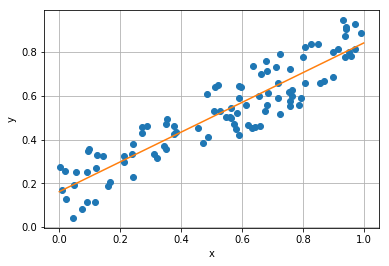

In [12]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r*x + (1 - r)*np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

a = (np.sum(x)*np.sum(y) - n*np.sum(x*y))/(np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
plt.plot([0, 1], [b, a + b])
plt.show()

4.5 Дополните код расчетом коэффициента корреляции x и y

In [13]:
R = ((x - x.mean()) * (y - y.mean())).sum() / np.sqrt((((x - x.mean())**2).sum() * ((y - y.mean())**2).sum()))
print(R)

0.9163958691905719


Мачта освещения футбольного стадиона содержит полотно из 20 рядов по 50 ламп, т.е. всего 1000 ламп.
Вероятность "перегорания" каждой лампы Р = 0.001 (за 2 часа работы, пока идет матч)
перед началом матча все лампы исправны, по нормативам игру можно проводить, должно работать не менее 90% ламп 
достаточна ли такая надежность ламп для проведения матча (т.е. требуется, чтобы до конца игры перегорело не более 100 ламп)?


Усложнения:
- Какие лампы (с каким максимальным параметром Р) необходимо купить, чтобы можно было проводить подряд несколько игр на протяжении 10 часов без выключения мачт?
- Как изменятся ответы, если есть еще вероятность перегрева и отказа проводки к каждому из ряду ламп Р20=10е-5? (т.е. одновременного отказа 20 лемп сразу)
Примечание: задача из реальной жизни; возможно, она недоформулирована, если так - надо додумать самому


In [14]:
def binomial(n, k, p):
    """Функция возвращает вероятность из биномиального распределения"""
    C = math.factorial(n)/(math.factorial(n - k) * math.factorial(k))
    value = C * p**k * (1 - p)**(n - k)
    return value

In [15]:
def get_prob(n, k, p):
    """Функция возвращает вероятность сгорания k ламп из n"""
    p_k = 0

    for i in range(k):
        p_k += binomial(n, i, p)
    
    p_k = 1 - p_k
    return p_k

In [16]:
p = 0.001 # вероятность выхода из строя одной лампочки
n = 1000 # всего лампочек
k = 100 # максимальное количество лампочек, которрые могут сгореть

# находим вероятность того, что из строя за 2 часа работы выйдут 100 лампочек и матч не состоится
p_100 = get_prob(n, k, p)
p_100

7.771561172376096e-16

Вероятногсть близка к 0, поэтому надежность в 0,001 достаточна для проведения матча

#### Усложнение 1
Какие лампы (с каким максимальным параметром Р) необходимо купить, чтобы можно было проводить подряд несколько игр на протяжении 10 часов без выключения мачт?

Примем, что не более 2% сорванных 10 часовых матчей - достаточный уровень

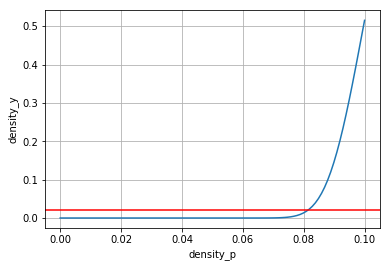

In [17]:
density_p = np.linspace(0, 0.1, 100) # строим плотность вероятностей
density_y = get_prob(n, k, density_p)

plt.plot(density_p, density_y)
plt.xlabel('density_p')
plt.ylabel('density_y')
plt.axhline(y=0.02, color='red')
plt.grid(True)

При уровне надежности p = 0.02 достаточная вероятность сгорания одной лампочки примерно равна 0.083